In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 31s 3us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

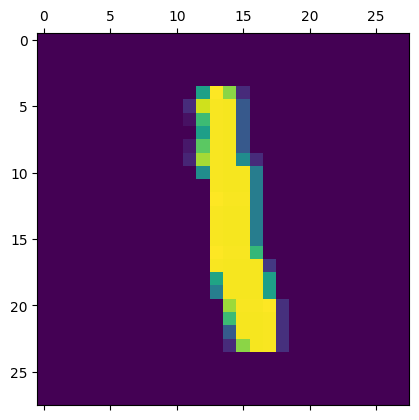

In [12]:
plt.matshow(X_train[6])

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
X_train.shape
#1st dimension is number of samples i.e 6000
#2nd and 3rd dimension is each individual image

(60000, 28, 28)

In [25]:
#to increase the accuracy we need to scale the data
#the values in the array range from 0 to 255
#therefore we are dividing X_train and X_test by 255
X_train= X_train / 255
X_test= X_test / 255

In [26]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [27]:
#flattening the 2x2 array by reshape function 
#In reshaping we need an array of(6000, 784)
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [28]:
X_test_flattened=X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [29]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Without hidden layer

In [30]:
#creating a neural network with just input and output layer
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')#10=output
]
)
model.compile(
    optimizer= 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4703 - accuracy: 0.8753
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3042 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2833 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2731 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2667 - accuracy: 0.9259


In [31]:
#checking accuracy for test dataset
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2705 - accuracy: 0.9248


[0.2704910933971405, 0.9247999787330627]

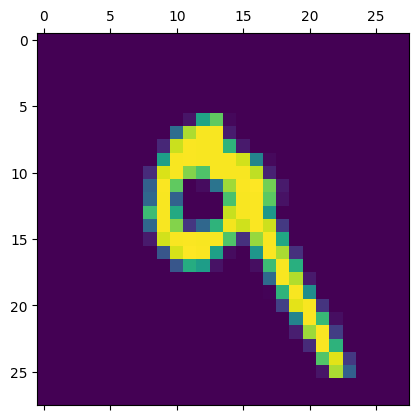

In [36]:
plt.matshow(X_test[7])

In [37]:
#predicting for all values and storing it in a var
y_predicted =model.predict(X_test_flattened)
y_predicted[7]
#gives the output in the form of array which is supposed to be the entire output layer of the neural network

313/313 [==============================] - 1s 2ms/step


array([1.6943965e-06, 1.6188829e-01, 9.5114876e-03, 3.8684838e-02,
       2.4791050e-01, 2.1985961e-01, 1.5496601e-03, 1.8096674e-02,
       1.6029137e-01, 9.7874331e-01], dtype=float32)

In [38]:
np.argmax(y_predicted[7]) #displaying the number located at the maximum index

9

In [39]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [40]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

# Making a confusion matrix

In [41]:
#using confusion marix to evaluate the performance of our model
cm = tf.math.confusion_matrix(labels = y_test, predictions= y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    5,    2,    3,    0],
       [   0, 1109,    2,    2,    0,    1,    4,    2,   15,    0],
       [   7,   12,  898,   20,    9,    5,   12,   11,   55,    3],
       [   2,    0,   12,  929,    0,   22,    3,   10,   26,    6],
       [   2,    1,    3,    2,  917,    0,   10,    3,   10,   34],
       [   9,    3,    1,   32,    9,  781,   14,    5,   32,    6],
       [  13,    3,    6,    2,    7,   11,  910,    2,    4,    0],
       [   2,    5,   19,    9,    8,    1,    0,  941,    5,   38],
       [   5,    6,    5,   21,    9,   21,    8,    8,  883,    8],
       [  10,    7,    1,   13,   28,    6,    0,   17,    9,  918]])>

Text(95.72222222222221, 0.5, 'Truth')

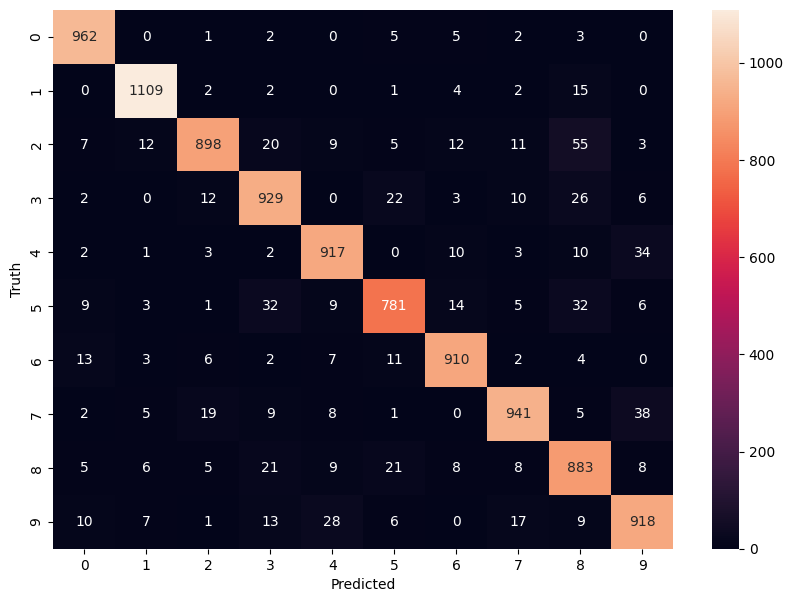

In [44]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#anything which is not in the diagonal are the errors
#962 times the label was 0 and our model predicted it to be 0 
#i.e. its prediction was correct 962 times

# Adding a hidden layer

In [45]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
]
)
model.compile(
    optimizer= 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2697 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1230 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0857 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0657 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0508 - accuracy: 0.9845


In [46]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0777 - accuracy: 0.9739


[0.07771264761686325, 0.9739000201225281]

Text(95.72222222222221, 0.5, 'Truth')

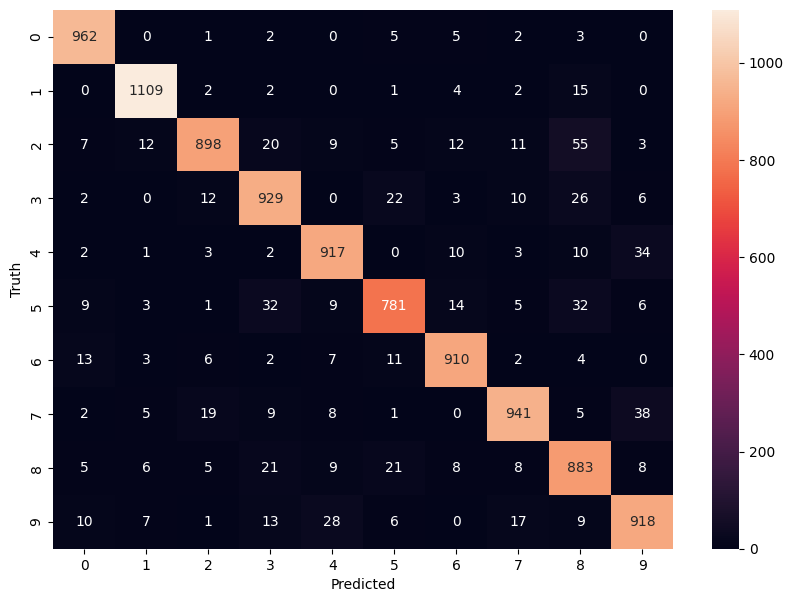

In [47]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#without creating a flattenedarray / using keras.Flatten fucntion
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
]
)
tb_callback = tf.keras.callbacks.TensorBoard(log_dir)

model.compile(
    optimizer= 'SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)